In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

# Gets the box score of every single game (NBA + WNBA + others: nba.com doesn't seperate the leagues) 
# from 2014-2021 into a dataframe.
all_games_finder = leaguegamefinder.LeagueGameFinder()
all_games = all_games_finder.get_data_frames()[0]

# Creates empty dataframe with the same column names passed in from the dataframe containing all the games.
games = pd.DataFrame(all_games)

# Appends every game containing an NBA team in the all_games df to the games df. 
# Note: this double loop might legit get us 50% off... need to come up with a better implementation lmao. 
# It takes like 10 minutes... 
#nba_teams = teams.get_teams()
#for team in nba_teams:
#    temp_id = team['id']
#    for index, row in all_games.iterrows():
#        if row['TEAM_ID'] == temp_id:
#            games = games.append(row, ignore_index = True)
games.columns
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22021,1610612738,BOS,Boston Celtics,0022100215,2021-11-17,BOS @ ATL,None,180,81,...,0.909,8,21,29,18,8,1,10,12,-14.0
1,22021,1610612737,ATL,Atlanta Hawks,0022100215,2021-11-17,ATL vs. BOS,None,180,94,...,0.846,4,28,32,24,6,3,9,12,14.0
2,22021,1610612751,BKN,Brooklyn Nets,0022100216,2021-11-17,BKN vs. CLE,None,169,81,...,0.789,4,29,33,25,6,1,8,13,19.4
3,22021,1610612765,DET,Detroit Pistons,0022100214,2021-11-17,DET vs. IND,None,217,90,...,0.727,8,30,38,16,13,5,12,18,4.2
4,52021,1612709923,WCB,Windy City Bulls,2052100055,2021-11-17,WCB vs. MCC,None,120,61,...,0.714,5,26,31,16,5,3,11,18,1.0


In [3]:
#This assumes Min is minutes played for each team
#sort the columns to pair each game with the two teams\
#!!!DONT RUN THIS BLOCK MORE THAN ONCE!!!
games = games.sort_values(by=['GAME_ID'])

gamesteam1 = games[games.index % 2 == 0]
gamesteam2 = games[games.index % 2 == 1]

gamesteam1 = gamesteam1.reset_index(drop=True)
gamesteam2 = gamesteam2.reset_index(drop=True)

games = gamesteam1.join(gamesteam2, rsuffix='_other')

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT_other,OREB_other,DREB_other,REB_other,AST_other,STL_other,BLK_other,TOV_other,PF_other,PLUS_MINUS_other
0,12015,1610612743,DEN,Denver Nuggets,0011500001,2015-10-02,DEN @ LAC,L,240,96,...,0.769,9,30,39,22,12,6,13,15,7.0
1,12015,1610612753,ORL,Orlando Magic,0011500002,2015-10-03,ORL vs. CHA,L,240,100,...,0.743,7,34,41,30,7,2,13,15,6.0
2,12015,1610612754,IND,Indiana Pacers,0011500003,2015-10-03,IND vs. NOP,L,241,105,...,0.676,19,36,55,16,9,3,11,22,5.0
3,12015,1610612762,UTA,Utah Jazz,0011500004,2015-10-04,UTA @ LAL,W,240,90,...,0.619,14,34,48,11,8,6,13,31,-19.0
4,12015,1610612761,TOR,Toronto Raptors,0011500005,2015-10-04,TOR vs. LAC,W,241,93,...,0.700,5,28,33,16,6,3,24,29,-20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,52021,1612709911,IWA,Iowa Wolves,2052100054,2021-11-17,IWA vs. GRG,None,179,84,...,0.545,10,36,46,21,10,4,20,29,11.0
14996,52021,1612709923,WCB,Windy City Bulls,2052100055,2021-11-17,WCB vs. MCC,None,120,61,...,0.875,10,25,35,20,15,2,12,27,14.0
14997,52021,1612709903,SLC,Salt Lake City Stars,2052100056,2021-11-17,SLC vs. SCW,None,60,17,...,1.000,5,37,42,23,7,9,19,19,22.0
14998,72021,1612709930,GLI,G League Ignite,2072100002,2021-10-31,GLI @ SXF,L,241,90,...,0.875,16,36,52,33,6,2,8,7,0.0


In [ ]:
#Things to drop later:
#team ID, not relevant and good teams might be identified by this => more bias
#Ironically, block percentage only really correlates to total blocks (maybe not, bc there's a few blocks that also correlate either negatively or positively to blkp)
#Maybe freethrough percent? It correlates to a few other things so I'm not sure If we should really. 
games.drop(columns=['SEASON_ID_other', 'GAME_DATE_other']) #irrelevant and basically an exact duplicate of that in the first column.

We should make WL a choice between 1 and 0, and maybe add it as a column to the end of the dataset

In [4]:
#Brett Owen feature chunk
#STLP = Steal Percentage = 100 * (steals * (team's minutes played / 5)) / (minutes played * opp possessions)
#games["STLP"]

games["BLKP"] = 100 * (games["BLK"] * (games["MIN"]/5))/ (games["MIN"] * (games["FGA_other"] - games["FG3A_other"])) # need to subtract fga other by 3 point shot attempts

<AxesSubplot:>

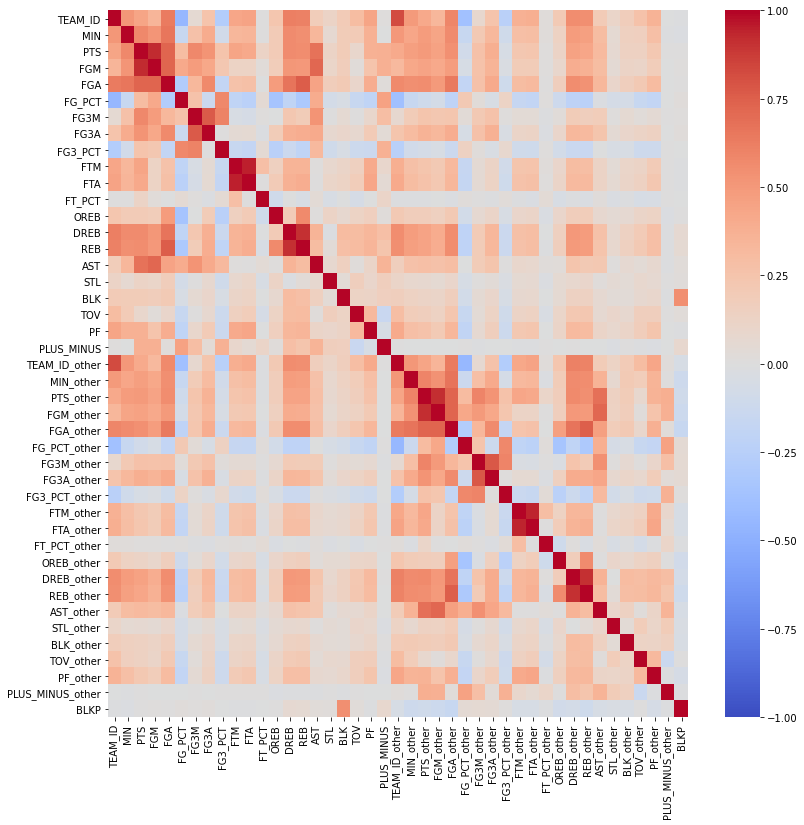

In [11]:
#Data Visualizaiton
plt.figure(figsize=(13,13))
sns.heatmap(games.corr(),cmap='coolwarm',vmin=-1)